# การสร้าง ESP32 LED Component

ESP-IDF รองรับการเขียนโปรแกรมในภาษา C++ ช่วยให้สามารถสร้าง component ในลักษณะ object ได้ ซึ่งจะทำให้การเขียนโปรแกรมทำได้อย่างเป็นธรรมชาติมากขึ้น

พิจารณา class LED เบื้องต้นที่มีองค์ประกอบอย่างง่าย 

 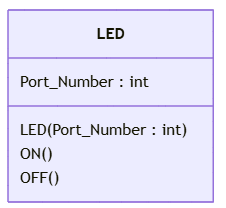

|element| Description|
|-------|------------|
|  Port_Number : int | กำหนดหมายเลขพอร์ตที่เชื่อมต่อกับ  LED|
|  LED(Port_Number : int) | Constructor ทำหน้าที่กำหนดค่าต่าง ๆ ในตอนสร้าง object เช่น การกำหนดทิศทางของพอร์ต มีพารามิเตอร์ 1 ตัวตือหมายเลขขาของพอร์ตที่เชื่อมต่อกับ LED|
|  ON() : void  | สั่งให้ LED ติด |
|  OFF() : void | สั่งให้ LED ดับ |




## สำดับการทดลอง
### 1. สร้าง  project ใหม่ ชื่อ LED_Test

```bash
    idf.py create-project LED_Test
```


### 2. สร้าง  Component ใหม่ ชื่อ LED

``` bash
    mkdir S67890
    cd S67890
    idf.py create-component LED
```

**หมายเหตุ** เปลี่ยน S67890 เป็นรหัสนักศึกษา


2.1 เปลี่ยนชื่อไฟล์ LED.c เป็น LED.cpp

2.2 เพิ่มการประกาศคลาสลงใน LED.h โดยให้ใส่ `#include "driver/gpio.h"` ด้วย เพื่อใช้งาน GPIO



##### ไฟล์ LED.h


In [ ]:
#include "driver/gpio.h" 

class LED
{
    int PinNumber;
public:
    LED(int PinNumber);
    void ON();
    void OFF();
};

2.3 แก้ไขไฟล์ LED.cpp ให้เป็นดังนี้


##### ไฟล์  LED.cpp


In [ ]:
#include <stdio.h>
#include "LED.h"

LED::LED(int Pin)
{
    PinNumber = Pin;
    gpio_set_direction((gpio_num_t)PinNumber, GPIO_MODE_OUTPUT);
}

void LED::ON()
{
    gpio_set_level((gpio_num_t)PinNumber,1);
}

void LED::OFF()
{
    gpio_set_level((gpio_num_t)PinNumber,0);
}

2.4 แก้ไขไฟล์ CMakeLists.txt ใน component/LED ให้เป็นดังต่อไปนี้

##### CMAkeLists.txt (ใน component/LED)

In [ ]:
idf_component_register(SRCS "LED.cpp"
        INCLUDE_DIRS "include"
        REQUIRES driver)

### 3. แก้ไขไฟล์ต่าง ๆ ใน Main

3.1 เปลี่ยนชื่อไฟล์ LED_Test.c เป็น main.cpp

3.2 แก้ไขไฟล์ CMakeLists.txt ใน Main เพื่อเปลี่ยนชื่อไฟล์ LED_Test.c เป็น main.cpp


#### CMAkeLists.txt (ใน Main)

In [ ]:
idf_component_register(SRCS "main.cpp"
                    INCLUDE_DIRS "."
                    REQUIRES LED)


3.3 แก้ไขไฟล์ main.cpp


In [ ]:

#include <stdio.h>
#include "freertos/FreeRTOS.h"
#include "freertos/task.h"
#include "LED.h"

extern "C" void app_main(void);

void app_main(void)
{
    LED led1(5); 
    LED led2(17); 
    while(1)
    {        
        led1.ON();
        led2.OFF();
        vTaskDelay(500/portTICK_PERIOD_MS);
        led1.OFF();
        led2.ON();
        vTaskDelay(500/portTICK_PERIOD_MS);
    }
}

### 4. แก้ไข CMakeLists ใน root เพื่อให้รู้จัก LED component


In [ ]:
# The following five lines of boilerplate have to be in your project's
# CMakeLists in this exact order for cmake to work correctly
cmake_minimum_required(VERSION 3.16)

set(EXTRA_COMPONENT_DIRS "../S67890/LED")   # เพิ่มบรรทัดนี้

include($ENV{IDF_PATH}/tools/cmake/project.cmake)
project(LED_Test)


### 5. Build และทดสอบบนบอร์ด ESP32

``` bash
    cd LED_Test
    idf.py build
```

### 6.Push โฟลเดอร์ S67890 เป็น repository บน github

เราจะใช้ใน project ถัดไป